In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.712856,0.607749,0.203608,0.214865,0.223908,0.232658,0.238605,0.243965,...,0.246744,0.060149,0.000521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.713911
1,2,6.894754e-06,0.685428,0.628757,0.150225,0.197829,0.229038,0.239566,0.244874,0.257910,...,0.331597,0.185101,0.001551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.737810
2,3,1.522987e-05,0.660953,0.838911,0.157543,0.164678,0.169969,0.177148,0.191499,0.192540,...,0.045236,0.001468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.681016
3,4,2.800000e-05,0.636547,0.588290,0.233246,0.239555,0.245093,0.249101,0.249603,0.248401,...,0.239621,0.226389,0.186982,0.126162,0.065392,0.025896,0.016059,0.009784,0.005888,0.808658
4,5,4.366489e-05,0.616511,1.398846,0.149167,0.155593,0.154715,0.148845,0.133587,0.109632,...,0.061096,0.046014,0.032474,0.022147,0.014402,0.008315,0.003923,0.000995,0.000000,0.616913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.314033,0.434433,0.575033,0.584106,0.590567,0.595321,0.599118,0.601964,...,0.606659,0.608437,0.609840,0.611714,0.612138,0.609719,0.604708,0.583484,0.476163,0.919430
96,97,2.743041e-07,0.302527,0.429131,0.566496,0.576195,0.583922,0.589647,0.594218,0.597543,...,0.603024,0.605962,0.608465,0.610133,0.611551,0.612973,0.611330,0.600603,0.538276,0.918526
97,98,1.221970e-07,0.312547,0.432244,0.558475,0.567480,0.574231,0.579534,0.584142,0.588107,...,0.595238,0.597879,0.600026,0.602101,0.603964,0.604825,0.603122,0.585352,0.479128,0.917071
98,99,3.085853e-08,0.315238,0.432764,0.575376,0.584181,0.590579,0.595116,0.598171,0.601270,...,0.606813,0.609036,0.610847,0.612984,0.614824,0.615015,0.610577,0.593350,0.511621,0.919325


(0.3, 0.6)

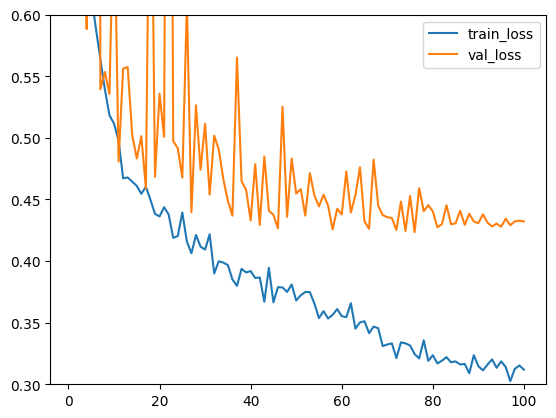

In [9]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

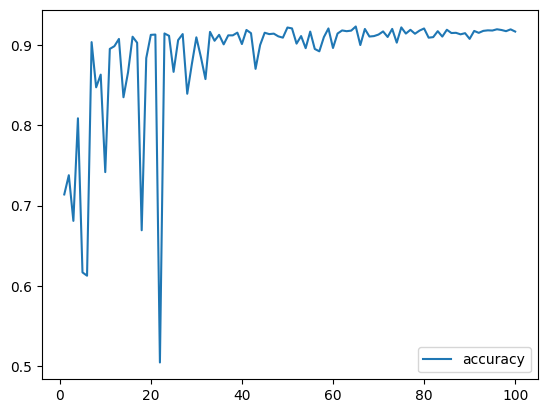

In [10]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

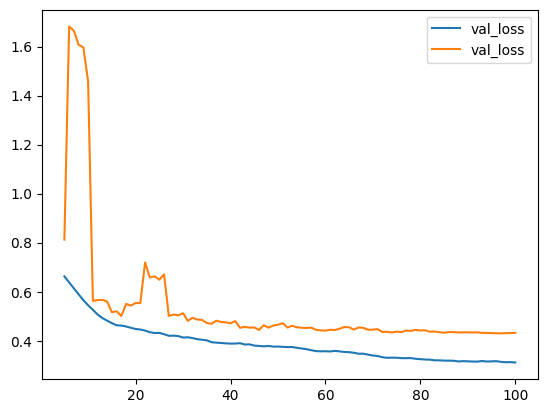

In [11]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)
0.6294575333595276


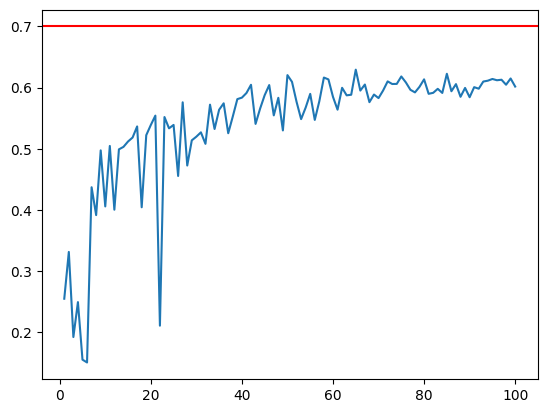

In [12]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

print(np.max(df_fbeta))

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


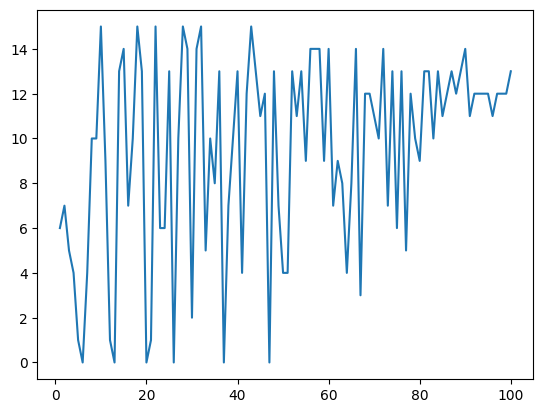

In [13]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")